In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import bokeh as bk
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

from plotnine import *
import plotnine.options as pno

import altair as alt

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("data.csv")

bey = dataset[dataset['artists'].str.contains('Beyoncé')]
bey['group'] = 'Beyonce'
beat = dataset[dataset['artists'].str.contains('Beatles')]
beat['group'] = 'The Beatles'

sample = bey.append(beat)
sample.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,group
164588,0.93100,['The Beatles'],0.442,229147,0.0782,0,1w344nykRKrqN2JsMIUlvR,0.895000,4,0.1080,-16.256,1,She's Leaving Home - Take 1 / Instrumental,29,1967-05-26,0.0374,128.584,0.198,1967,The Beatles
166656,0.00561,['The Beatles'],0.656,179853,0.8650,0,6r7JAngkBzKGDKRUzLgY2U,0.000104,4,0.0853,-8.241,1,The Ballad Of John And Yoko - Remastered 2009,37,1988-03-07,0.0311,135.183,0.938,1988,The Beatles
166665,0.31100,['The Beatles'],0.571,139680,0.7880,0,1Q7gCIpOjIIU0bUKcGzrG4,0.000004,7,0.2870,-8.159,1,I Feel Fine - Remastered 2009,37,1988-03-07,0.0447,90.138,0.769,1988,The Beatles
166683,0.44900,['The Beatles'],0.553,123600,0.7100,0,3k6zSunlStXxWF0s1063lk,0.000001,2,0.0989,-10.492,1,Thank You Girl - Remastered 2009,38,1988-03-07,0.0314,137.717,0.972,1988,The Beatles
166696,0.57000,['The Beatles'],0.492,146533,0.7300,0,27E39dDg0Bx1RzkF3eJJsb,0.000008,7,0.2460,-6.434,1,I Want To Hold Your Hand - Remastered 2009,38,1988-03-07,0.0416,131.011,0.916,1988,The Beatles


In [3]:
grouped_sample = sample.groupby('group', as_index=False).agg({"acousticness": "mean",
 "danceability": [min, max, 'mean', 'std'],
  "duration_ms": [min, max, 'mean', 'std'],
   "energy": [min, max, 'mean', 'std'],
    "explicit": [min, max, 'mean', 'std'],
    "instrumentalness": [min, max, 'mean', 'std'],
    "loudness": [min, max, 'mean', 'std'],
    "popularity": [min, max, 'mean', 'std'],
    "tempo": [min, max, 'mean', 'std'],
    "valence": [min, max, 'mean', 'std']})

grouped_sample.columns = [' '.join(col).strip() for col in grouped_sample.columns.values]

grouped_sample.head()


,group,acousticness mean,danceability min,danceability max,danceability mean,danceability std,duration_ms min,duration_ms max,duration_ms mean,duration_ms std,...,popularity mean,popularity std,tempo min,tempo max,tempo mean,tempo std,valence min,valence max,valence mean,valence std
0,Beyonce,0.191122,0.2300,0.925,0.579780,0.157415,79200,395987,249502.585366,52477.051482,...,58.691057,9.813950,63.345,200.053,123.240146,34.607735,0.0388,0.887,0.461734,0.212679
1,The Beatles,0.360375,0.0959,0.915,0.522644,0.141583,25987,502013,174371.561743,59184.311960,...,48.046005,12.917036,59.004,209.242,121.081455,27.243454,0.0378,0.977,0.618439,0.245837



## Grouped Barplot Test

Beyonce x The Beatles, numeric data.


### Matplotlib
To label the bars you literally have to write a whole function.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(grouped_sample.group.unique()))
bar_width = 0.4
b1 = ax.bar(0, grouped_sample.loc[grouped_sample['group'] == 'Beyonce', 'danceability mean'],
            width=bar_width)
b2 = ax.bar(0 + bar_width, grouped_sample.loc[grouped_sample['group'] == 'The Beatles', 'danceability mean'],
            width=bar_width)

ax.set_xticks([0,bar_width])
ax.set_xticklabels(grouped_sample.group.unique())

ax.set_xlabel('Artist', labelpad=15)
ax.set_ylabel('Danceability', labelpad=15)
ax.set_title('Danceability, Beyonce vs Beatles', pad=15)



### Seaborn

Defaults to showing mean. Title syntax doesn't work as expected.

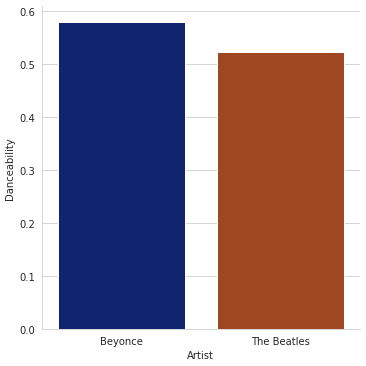

In [12]:
with sns.axes_style("whitegrid"):
    g = sns.catplot(
        dodge=False,
        data=sample, 
        kind="bar",
        x="group", 
        y="danceability", 
        hue="group",
        ci=None, palette="dark"
    )
    #g.set_title("Danceability, Beyonce vs Beatles")
    g.set_axis_labels("Artist", "Danceability")
    g

### Bokeh

In [26]:
output_notebook()

p = figure(title="Danceability, Beyonce vs Beatles", 
           y_axis_label='Danceability', 
           x_axis_label='Artist', 
           width=500, 
           height = 300,
           x_range=grouped_sample.group.unique())

p.vbar(x=grouped_sample.group.unique(), 
    top=grouped_sample['danceability mean'], 
    width=0.9)
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

Loading BokehJS ...

### Altair


In [25]:
source = sample

viz = alt.Chart(source)
viz = viz.mark_bar()
viz = viz.encode(
    x='group:O',
    y='mean(danceability):Q',
    color='group:N'
)
viz = viz.properties(title='Danceability, Beyonce vs Beatles').properties(width=400)

viz

alt.Chart(...)

### Plotnine


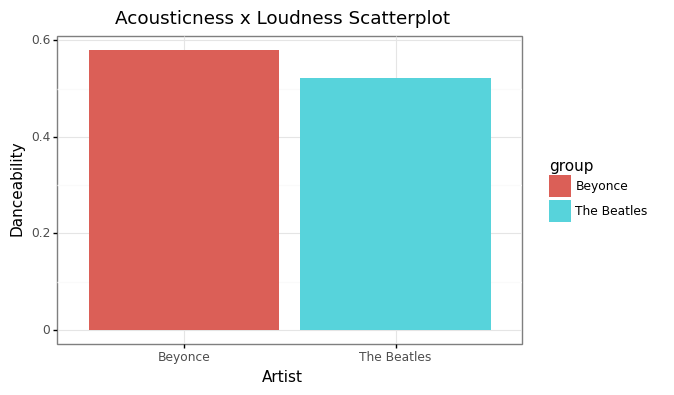

<ggplot: (326927135)>

In [33]:
pno.dpi = (100)
pno.figure_size = (6,4)
ggplot(data=grouped_sample, mapping=aes(x='group', y='danceability mean', group='group', fill = 'group')) + \
    theme_bw() + \
    geom_col(stat = 'identity') + \
    labs(title = "Danceability, Beyonce vs Beatles", x="Artist", y="Danceability")

### Plotly

Setting element visual traits requires passing vectors the same length as data, column names, etc. Can't just pass a constant.

In [54]:

import plotly.graph_objects as go

animals=grouped_sample.group.unique()

fig = go.Figure(data=[
    go.Bar(x=animals, y=grouped_sample['danceability mean'].round(3))])
# Change the bar mode
fig.update_layout(barmode='group',
    title="Danceability, Beyonce vs Beatles", 
    template='plotly_white',
    width=500,height=400,
    margin=dict(l=15,r=25,b=15,t=40,pad=1))
fig.show()

# fig = px.scatter(dataset, 
#                  x="acousticness", 
#                  y='loudness', 
#                  title="Acousticness x Loudness Scatterplot", 
#                  template='plotly_white')
# fig.update_layout(
#     width=700,height=400,
#     margin=dict(l=15,r=25,b=15,t=40,pad=1))
# fig.show()

## Grouped Bar Results

Unscientific rankings by me, 1 = best, 6 = worst. Ease of use now includes consistency in the grammar making it easier to move from histogram to scatterplot also.


|            |features     |beauty    |ease of use   |
|------------|-------------|----------|--------|
|matplotlib  |    6        |    3     |   6   |
|seaborn     |    4        |    5     |   4   |
|bokeh       |    1        |    1     |   1   |
|altair      |    3        |    2     |   3   |
|plotnine    |    2        |    4     |   2   |
|plotly      |    5        |    6     |   5   |

